In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Prerequisites
1. Basis
2. Linear Transformation
3. Null Space
4. Invertability
5. Determinants

# What is an Eigenvalue and Eigenvector

Take a linear Transformation, $T$, and apply it to some vector, ${v}$. Let's say that after applying the transformation, the vector, $T(v)$, still points in the direction $v$ points in. The difference between $T(v)$ and $v$ being that $T(v)$ is scaled, be it longer or shorter, by some factor, $\lambda$. Written here mathematically as:

$$T(v) = \lambda{v}$$

v is the Eigenvector here, and $\lambda$ is the Eigenvalue here.

By definition: If $T$ is a linear transformation from a vector space $V$ over a field $F$ into itself and $v$ is a nonzero vector in $V$, then $v$ is an eigenvector of $T$ if $T(v)$ is a scalar multiple of $v$. where λ is a scalar in $F$, known as the eigenvalue, characteristic value, or characteristic root associated with $v$. 
(Source: Wikipedia) $$$$
In terms of matrices, we would typically see:
$$Av = \lambda{v}$$
Where $A$ is an $nxn$ matrix. $$$$
If a set of eigenvectors of T forms a basis of the domain of T, then this basis is called an eigenbasis. (Source: Wikipedia)

Another example of an "eigen" thing, is if we take the differential function, $\frac{d}{dx}$ as our linear transformation. This will give us an **"eigenfunction"**.
$$\frac{d}{dx}e^{\lambda{x}} = \lambda{e^{\lambda{x}}}$$
Here, the $e^{\lambda{x}}$ is the eigenfunction, and $\lambda$ is the eigenvalue.

# Examples

Imagine if we just take the identity matrix as A:

$$\mathbf{A} = \left[ \begin{array}{ccc} 1 & 0 & 0\\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{array}\right]$$

Then we apply it to the "eigenquation":

$$\left[ \begin{array}{ccc} 1 & 0 & 0\\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{array}\right]x = \lambda{x}$$
$$$$
* We are in a 3-D space that spans all of $\mathbb{R}^3$ because of the basis vectors: $\left[\left(\begin{array}{c} 1 \\ 0 \\ 0 \end{array}\right),\left(\begin{array}{c} 0 \\ 1 \\ 0 \end{array}\right), \left(\begin{array}{c} 0 \\ 0 \\ 1 \end{array}\right)\right]$ from $A$.
* If we take any vector from $\mathbb{R}^3$ and apply $A$ to it, we will just end up getting the same vector scaled by 1. So in this case:
    1. Every vector in $\mathbb{R}^3$ is an eigenvector.
    2. The only eigenvalue is $\lambda = 1$.

Let's now assume:

$$\left[ \begin{array}{ccc} 2 & 0 & 0\\ 0 & 2 & 0 \\ 0 & 0 & 2 \end{array}\right]x = \lambda{x}$$

* We can see that this will only scale the vectors by 2, which means every vector is an eigenvector, and $\lambda = 2$.

Let:
    $$A = \left[\begin{array}{ccc} 2 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{array}\right]$$
* Let's find the eigenvectors and eigenvalues by trial and error.
    1. Let's try $x = \left(\begin{array}{c} 1 \\ 1 \\ 1 \end{array}\right)$ :
        $$\left[\begin{array}{ccc} 2 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{array}\right]\left(\begin{array}{c} 1 \\ 1 \\ 1 \end{array}\right) = \left(\begin{array}{c} 2 \\ 1 \\ 1 \end{array}\right)$$$$$$
        This cannot be in the form of $Ax = \lambda{x}$. Thus, $\left(\begin{array}{c} 1 \\ 1\\ 1 \end{array}\right)$ cannot be an eigenvector.
    2. Let's try $x = \left(\begin{array}{c} 0 \\ a \\ b \end{array}\right)$ :
        $$\left[\begin{array}{ccc} 2 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{array}\right]\left(\begin{array}{c} 0 \\ a \\ b \end{array}\right) = \left(\begin{array}{c} 0 \\ a \\ b \end{array}\right)$$
        This means any vector of the form: $\left(\begin{array}{c} 0 \\ a \\ b \end{array}\right)$ is an eigenvector, with $\lambda = 1$.

# How to find the Eigenvalues and Eigenvectors

Since we know that the "eigenfunction" is always $Ax = \lambda{x}$ if we represent the linear transformation as an $nxn$ matrix, we can apply this to every problem:
$$Ax = \lambda{x} = \lambda{I}x$$
$$Ax - \lambda{Ix} = 0$$
$$(A - \lambda{I)}x = 0$$
 
1. Since $(A - \lambda{I})$ is a linear transformation and knowing $x$ has to be a non-trivial solution like a Since $x$ has to be a non-trivial solution to this equation, $x \ \epsilon \ {null[(A - \lambda{I})]}$ or, $x \ \epsilon$ kernel.
2. This means that $(A - \lambda{I})$ is non-invertible.
3. So $det(A - \lambda{I})$ $=$ $0$.

The key to solve for the eigenvalues, is to solve:
$$det(A - \lambda{I}) = 0$$
This gives us the **characteristic polynomial**.

Let's assume that we found an eigenvalue, $\lambda{}_1$. To find an eigenvector, you just plug in $\lambda{}_1$ into $(A - \lambda{I})x = 0$ and find $x$. We can show this by example:
$$A = \left[\begin{array}{ccc} 2 & 1 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{array}\right]$$

$$A - \lambda{I} = \left[\begin{array}{ccc} 2 - \lambda & 1 & 0 \\ 0 & 1 - \lambda & 0 \\ 0 & 0 & 1 - \lambda \end{array}\right]$$

$$det(A - \lambda{I}) = (2 - \lambda{)}(1 - \lambda{)}(1 - \lambda{)}$$

The eigenvalues are: $\lambda{}_1 = 1$ and $\lambda{}_2 = 2$, but a key note here is that there is a "multiplicity" of 2 for eigenvalue, $\lambda = 1$.

1. Plugging in $\lambda = 1$:
    
    $$A - (1)I = \left[\begin{array}{ccc} 2 - 1 & 1 & 0 \\ 0 & 1 - 1 & 0 \\ 0 & 0 & 1 - 1 \end{array}\right] = \left[\begin{array}{ccc} 1 & 1 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & 0 \end{array}\right]$$
    
    Now we find $[A - (1)I]x = 0$:
    
    $$\left[\begin{array}{ccc} 1 & 1 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & 0 \end{array}\right]x = 0$$
    
    $$\left[\begin{array}{ccc} 1 & 1 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & 0 \end{array}\right]x = \left(\begin{array}{c} 0 \\ 0 \\ 0 \end{array}\right)$$
    
    $$\left[\begin{array}{ccc} 1 & 1 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & 0 \end{array}\right]\left(\begin{array}{c} x_0 \\ x_1 \\ x_2 \end{array}\right) = \left(\begin{array}{c} 0 \\ 0 \\ 0 \end{array}\right)$$
    
    $$\left(\begin{array}{c} x_0 + x_1 \\ 0 \\ 0 \end{array}\right) = \left(\begin{array}{c} 0 \\ 0 \\ 0 \end{array}\right)$$
    
    This implies $x_0 = -x_1$. So any vector that has $x_0 = -x_1$ gives us an eigenvector with the corresponding eigenvalue, $\lambda = 1$. $$$$
    Examples of eigenvectors for $\lambda = 1$:
    
    $$\left[\left(\begin{array}{c} 1 \\ -1 \\ 0 \end{array}\right), \left(\begin{array}{c} 60 \\ -60 \\ 99 \end{array}\right), \left(\begin{array}{c} 0 \\ 0 \\ 5 \end{array}\right)\right]$$
    
    Check:
    
    $$\left[\begin{array}{ccc} 2 & 1 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{array}\right]\left(\begin{array}{c} 1 \\ -1 \\ 0 \end{array}\right) = \left(\begin{array}{c} 1 \\ -1 \\ 0 \end{array}\right)$$
2. You would do the same with $\lambda = 2$

# Cool Properties of Eigenvalues

1. The trace of matrix $A$, $Tr(A)$, is also the sum of the eigenvalues of that matrix.
2. The determinant of matrix $A$, $det(A)$, is also the product of the eigenvalues of that matrix.
3. If you take matrix $A$ to the power of $k$, all of it's eigenvalues also raise to the power of $k$.
4. The matrix is invertible if and only if every eigenvalue is non-zero.
5. If you take matrix $A$ and apply some polynomial, $P$, to it, then the eigenvalues will also get raised to power $P$.
    * ex: $A^2 + 2*A + 5$ will give eigenvalues: $\lambda{}_i^2 + 2*\lambda_i + 5$ for each eigenvalue, $\lambda_i$.


# Eigenspaces, algebraic and geometric multiplicity

### Algebraic multiplicity

From our previous question, where $A = \left[\begin{array}{ccc} 2 & 1 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{array}\right]$, we ended up with our characteristic polynomial:

$$det(A - \lambda{I}) = (2 - \lambda{)}(1 - \lambda{)}(1 - \lambda{)}$$

Eigenvalues: $\lambda_1 = 1, \lambda_2 = 2$.
By definition, algebraic multiplicity of $\lambda_i$ , $\mu_A(\lambda_i)$, is the highest order you can make $(\lambda_i - \lambda)^k$ to "evenly" divide the characteristic polynomial.$$$$
1. In our question with $A$, we can find the algebraic multiplicity of $\lambda_2 = 2$ by plugging in $\lambda_2$ into $(\lambda_i - \lambda)^k$, giving us:

    $$(2 - \lambda)^k$$

    Now we divide the characteristic polynomial:

    $$\frac{det(A - \lambda{I})}{(2 - \lambda)^k} = \frac{(2 - \lambda{)}(1 - \lambda{)}(1 - \lambda{)}}{(2 - \lambda)^k}$$

    If we let $k = 1$:

    $$\frac{det(A - \lambda{I})}{(2 - \lambda)^1} = \frac{(2 - \lambda{)}(1 - \lambda{)}(1 - \lambda{)}}{(2 - \lambda)^1} = (1 - \lambda{)}(1 - \lambda{)}$$

    This divides the characteristic polynomial evenly. Now let's try $k = 2$:

    $$\frac{det(A - \lambda{I})}{(2 - \lambda)^2} = \frac{(2 - \lambda{)}(1 - \lambda{)}(1 - \lambda{)}}{(2 - \lambda)^2} = \frac{(1 - \lambda{)}(1 - \lambda{)}}{(2 - \lambda)^1}$$

    This does **NOT** divide the characteristic polynomial evenly, therefore, the algebraic multiplicity of $\lambda_2 = 1$, or $\mu_A(\lambda_2) = 1$.
    
2. Now let's find $\mu_A(\lambda_1)$, where $\lambda_1 = 1$:

    $$\frac{det(A - \lambda{I})}{(1 - \lambda)^k} = \frac{(2 - \lambda{)}(1 - \lambda{)}(1 - \lambda{)}}{(1 - \lambda)^k}$$
    
    Let k = 1:
    
    $$\frac{det(A - \lambda{I})}{(1 - \lambda)^1} = \frac{(2 - \lambda{)}(1 - \lambda{)}(1 - \lambda{)}}{(1 - \lambda)^1} = (2 - \lambda{)}(1 - \lambda{)}$$
    
    Let k = 2:
    
    $$\frac{det(A - \lambda{I})}{(1 - \lambda)^2} = \frac{(2 - \lambda{)}(1 - \lambda{)}(1 - \lambda{)}}{(1 - \lambda)^2} = (2 - \lambda{)}$$
    
    Let k = 3:
    
    $$\frac{det(A - \lambda{I})}{(1 - \lambda)^3} = \frac{(2 - \lambda{)}(1 - \lambda{)}(1 - \lambda{)}}{(1 - \lambda)^3} = \frac{(2 - \lambda{)}}{(1 - \lambda{)}^1}$$
    
    Therefore, $\mu_A(\lambda_1) = 2$.
* An important property of the Algebraic Multiplicity is that:

$$ 1 \leq \mu_A(\lambda_i) \leq n $$

Where $n$ is the dimension of the matrix. This is because we know that:

$$det(A - \lambda{I}) = (\lambda - \lambda_1)^{\mu_A(\lambda_1)}(\lambda - \lambda_2)^{\mu_A(\lambda_2)}...(\lambda - \lambda_d)^{\mu_A(\lambda_d)}$$

Where $d$ is the distinct number of eigenvalues. We can finally say:

$$\sum_{i = 1}^d\mu_A(\lambda_i) = n$$

### Eigenspaces

Let's take the same matrix, $A = \left[\begin{array}{ccc} 2 & 1 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{array}\right]$, and it's eigenvalue, $\lambda_1 = 1$. The **Eigenspace** of \lambda_1 is:

$$E = \{v: (A - \lambda_1{I})v = 0\}$$

Basically, the **Eigenspace**, $E$, of $\lambda_i$, is the kernel of this matrix in respect to the eigenvalue itself, $(A - \lambda_i{I})$.

For our example, the eigenspace of $A$ with $\lambda_1 = 1$ is:

$$E = \left[\begin{array}{c} -x_1 \\ x_1 \\ x_2 \end{array}\right]$$

Where $x_1$ and $x_2$ can be any real number.

* Properties that stem because of $E$ being the kernel/nullspace, thus being a **Linear Subspace**:
    1. **Closed under Addition**: If we have two vectors $u$,$v$ $\epsilon$ $E$, $A(u + v) = \lambda_i(u + v)$.
    2. **Closed under Scalar Multiplication**: If $\alpha$ is a scalar multiple, and $u$ $\epsilon$ $E$, then $A(\alpha u) = \lambda (\alpha u)$
    3. Geometric Multiplicity = Nullity of $(A - \lambda_i(I))$

### Geometric Multiplicity

The dimension of the eigenspace, $E$, in respect to $\lambda_i$, or the number of linearly independent eigenvectors in the eigenspace is known as the **Geometric Multiplicity** of $\lambda_i$, or $\gamma_A(\lambda_i)$.

$$\gamma_A(\lambda_i) = n - rank(A - \lambda_iI)$$

Lets try this by example, where $A = \left[\begin{array}{ccc} 2 & 1 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{array}\right]$ and $\lambda_1 = 1$:

$$\gamma_A(\lambda_i) = 3 - rank(\left[\begin{array}{ccc} 1 & 1 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & 0 \end{array}\right])$$

$$\gamma_A(\lambda_i) = 3 - 1$$

$$\gamma_A(\lambda_i) = 2$$

The important inequality relating geometric and algebraic multiplicities is:

$$1 \leq \gamma_A(\lambda_i) \leq \mu_A(\lambda_i) \leq n$$

But the proof for this requires knowledge of orthnormal matrices and their properties.

# Eigendecomposition and Diagonalization

## Prerequisites

0. Eigenvalues and Eigenvectors
1. Change of Basis
2. Similarity Transformation

By def. we know that given square matrix $A$, eigenvector $v_1$, and eigenvalue $\lambda_1$: 
$$Av_1 = \lambda_1{x}$$
But, if we add in another eigenvector, $v_2$, we will end up with:

$$A\left[v_1,v_2\right] = \left[\lambda_1{v_1},\lambda_2{v_2}\right]$$

We can also get the same thing by applying a diagonal matrix with the eigenvalues as it's entries:

$$\left[\lambda_1{v_1},\lambda_2{v_2}\right] = \left[\begin{array}{cc} \lambda_1 & 0 \\ 0 & \lambda_2 \end{array}\right]\left[v_1,v_2\right] = \left[v_1,v_2\right]\left[\begin{array}{cc} \lambda_1 & 0 \\ 0 & \lambda_2 \end{array}\right]$$

Now we will give a general explanation:
$$$$
Suppose we have an $nxn$ matrix, $A$, that has eigenvalues: $\left[\lambda_1,\lambda_2,...\lambda_n\right]$, and linearly independent eigenvectors: $\left[v_1,v_2,...v_n\right]$ that are associated with said eigenvalues. We can take those eigenvectors each of dimension/shape: $nx1$ / $(n,1)$, and combine them side-by-side to make a square matrix: $$Q = \left[\begin{array}{ccc} | & ... & | \\ v_1 & ... & v_n \\ | & ... & | \end{array}\right]$$
This is of dimension/shape, $nxn$ / $(n,1)$. $$$$

Applying $AQ$ will then yield:
$$AQ = \left[\begin{array}{ccc} | & ... & | \\ \lambda_1v_1 & ... & \lambda_nv_n \\ | & ... & | \end{array}\right]$$

As seen above, if we let $\Lambda$ be the diagonal matrix whose $\Lambda_j{}_j$ entries are the respective $i$th column in Q so they correspond with the correct eigenvector, we get:

$$\Lambda = \left[\begin{array}{ccc} \lambda_1 & ... & 0\\ ... & ... & ... \\ 0 & ... & \lambda_n \end{array}\right]$$

$$AQ = Q\Lambda = \left[\begin{array}{ccc} | & ... & | \\ \lambda_1v_1 & ... & \lambda_nv_n \\ | & ... & | \end{array}\right]$$

Since we know that $Q$ is linearly independent, then $Q$ is invertible and has an inverse, $Q^{-1}$. So we will apply the right multiplication to leave matrix $A$ alone:

$$AQQ^{-1} = A = Q\Lambda{Q^{-1}}$$

From this equation, we see that $A$ can be decomposed into a matrix containing its eigenvectors, a diagonal matrix with it's eigenvalues, and the inverse of said eigenvector matrix, all multiplied together.We call matrix $A$, **"Diagonalizable"**. This, is the **"Eigendecomposition"** of $A$, and is a similarity transformation. What we can get from the similarity transformation, is that matrix $A$ and diagonal matrix $\Lambda$ are both linear transformations, it's just that $\Lambda$ linearly transforms another basis, that basis being $Q$, i.e. the basis is the eigenvectors. This means that the matrix $Q$ is the change of basis matrix for the similarity transformation.

# Complex topics dealing with Eigen-stuff

0. Defective Matrices
1. Min-max theorem
2. Spectral Theory
3. Eigenfunctions

# Eigen-stuff in Numpy

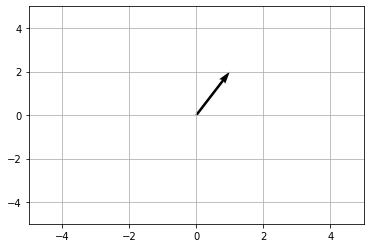

In [2]:
#Here we will just create some random vector
v = np.array([1,2])
#Let's display this vector in matplotlib
plt.quiver(v[0],v[1], angles='xy',scale_units='xy', scale = 1)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.grid()
plt.show()

In [3]:
#Now let's make a simple 2-D matrix to mess with
A =  np.array([[1,0],[0,2]])
A

array([[1, 0],
       [0, 2]])

**NOTE!! Finding eigenvalues using this method is not the optimal, and is only used as an introductory method. The standard way to solve for the eigenvalues, is to use Eigenvalue Algorithms like QR algorithm.**

Now we want to solve:

$$Ax = \lambda{x}$$

So we must use:

$$det(A - \lambda{I}) = 0$$

In [4]:
from sympy import * #Used to place "Placeholders" and print steps to solve using characteristic polynomial
def findeigenvalues(A): #where A is a matrix
    #Let's get A-lambda(I) matrix ready:
        n = A.shape[1]
        I = Matrix(np.identity(2,dtype=int)) #I
        a = Symbol('a') #lambda
        S = Matrix(A) #A
        for i in range(n):
            print((S-a*I)[i,:])
        cpoly = (S - a*I).det() #det(A-lambda(I))
        print("p(a) = " , cpoly)
        eigenvalues = solve(cpoly)
        print("The eigenvalues are:" , eigenvalues)
        return eigenvalues
print(findeigenvalues(A))

Matrix([[1 - a, 0]])
Matrix([[0, 2 - a]])
p(a) =  (1 - a)*(2 - a)
The eigenvalues are: [1, 2]
[1, 2]


In [5]:
#Or we can use numpy's own eigenvalue finder that uses an eigenvalue algorithm:
np.linalg.eig(A)[0] #We choose index 0, because that contains an np.array with the eigenvalues

array([1., 2.])

Now with $\lambda_1 = 1$ and $\lambda_2 = 2$, let's find the eigenvectors by solving:

$$\left(\begin{array}{cc} 1 - 1 & 0 \\ 0 & 2 - 1 \end{array}\right)x = \left(\begin{array}{c} 0 \\ 0 \end{array}\right)$$

$$\left(\begin{array}{cc} 1 - 2 & 0 \\ 0 & 2 - 2 \end{array}\right)x = \left(\begin{array}{c} 0 \\ 0 \end{array}\right)$$

In [6]:
def findeigenvectors(A):
    eigenvalues = findeigenvalues(A)
    print()
    zeros = np.zeros((1,A.shape[0]),dtype=int)
    for i in range(len(eigenvalues)):
        matrix = A-eigenvalues[i]*np.identity(2,dtype=int)
        print("Matrix -", eigenvalues[i],":")
        print(matrix) 
        #Note, using np.linalg.solve will not work, because we can see that when lambda = 1, there is not full rank. So this works only when there is full rank
        #np.linalg.solve(matrix,zeros)
        print()
findeigenvectors(A)

Matrix([[1 - a, 0]])
Matrix([[0, 2 - a]])
p(a) =  (1 - a)*(2 - a)
The eigenvalues are: [1, 2]

Matrix - 1 :
[[0 0]
 [0 1]]

Matrix - 2 :
[[-1 0]
 [0 0]]



In [7]:
#Or the best method, which is to use np.linalg.eig(A)[1] to grab all of the eigenvectors
eigenvectors = np.linalg.eig(A)[1]
#eigenvectors[:,i] will have the eigenvector for eigenvalue[i].
#So in our case,
val1 = np.linalg.eig(A)[0][0]
vec1 = eigenvectors[:,0]
val2 = np.linalg.eig(A)[0][1]
vec2 = eigenvectors[:,1]
print("Eigenvector for lambda =", val1, ":" , vec1)
print("Eigenvector for lambda =", val2, ":" , vec2)

Eigenvector for lambda = 1.0 : [1. 0.]
Eigenvector for lambda = 2.0 : [0. 1.]


Therefore, the vectors: $\left(\begin{array}{c} 1 \\ 0 \end{array}\right)$ and $\left(\begin{array}{c} 0 \\ 1 \end{array}\right)$, (as well as their scalar multiples), will be eigenvectors and will not rotate, only scale times their respective eigenvalue:

We want to see the effects that the Linear Transformation, A, has on other vectors compared to the 2 eigenvectors we found:

In [8]:
#Our non-eigenvectors that will "shift"
x0 = np.array([-2,1])
x1 = np.array([1,2])
x2 = np.array([-3,-2])

Before applying A:  x0 = [-2  1] x1 = [1 2] x2 = [-3 -2] eigenvector1 = [1. 0.] eigenvector2 = [0. 1.]
After applying A:  x0 = [-2  2] x1 = [1 4] x2 = [-3 -4] eigenvector1 = [1. 0.] eigenvector2 = [0. 2.]


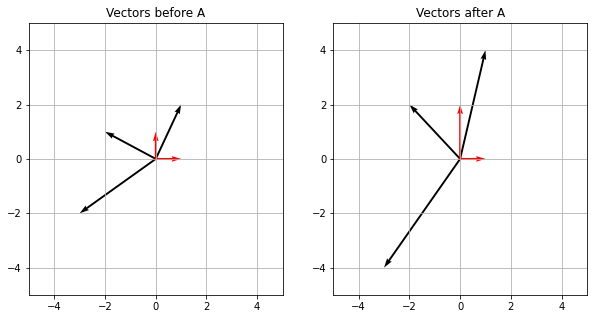

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
fx0 = np.matmul(A,x0)
fx1 = np.matmul(A,x1)
fx2 = np.matmul(A,x2)
evec1 = np.matmul(A,vec1)
evec2 = np.matmul(A,vec2)

print("Before applying A: " , "x0 =",x0,"x1 =",x1,"x2 =",x2,"eigenvector1 =",vec1,"eigenvector2 =",vec2)
print("After applying A: " , "x0 =",fx0,"x1 =",fx1,"x2 =",fx2,"eigenvector1 =",evec1,"eigenvector2 =",evec2)
axs[0].quiver(x0[0],x0[1], angles='xy',scale_units='xy', scale = 1)
axs[0].quiver(x1[0],x1[1], angles='xy',scale_units='xy', scale = 1)
axs[0].quiver(x2[0],x2[1], angles='xy',scale_units='xy', scale = 1)
axs[0].quiver(vec1[0],vec1[1], angles='xy',scale_units='xy', scale = 1,color='red')
axs[0].quiver(vec2[0],vec2[1], angles='xy',scale_units='xy', scale = 1,color='red')
axs[1].quiver(fx0[0],fx0[1], angles='xy',scale_units='xy', scale = 1)
axs[1].quiver(fx1[0],fx1[1], angles='xy',scale_units='xy', scale = 1)
axs[1].quiver(fx2[0],fx2[1], angles='xy',scale_units='xy', scale = 1)
axs[1].quiver(evec1[0],evec1[1], angles='xy',scale_units='xy', scale = 1,color='red')
axs[1].quiver(evec2[0],evec2[1], angles='xy',scale_units='xy', scale = 1,color='red')
axs[0].set_xlim(-5,5)
axs[0].set_ylim(-5,5)
axs[0].grid()
axs[0].set_title("Vectors before A")
axs[1].set_title("Vectors after A")
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.grid()
plt.show()

You can see that the eigenvectors (in red) were only scaled after the Linear Transformation $A$ was applied to them. While the other vectors were transformed by being rotated and scaled.

### Rotation using Matrices

We want to construct a 2-D matrix that will rotate 2-D space by degree, $\theta$. But how will we find the matrix? First let's do some tests to find some patterns.

1. We know that we can easily rotate everything by 90 degrees by changing the standard basis, $\left(\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right)$. From the standard basis, we know that $\hat{i}$ is point to the right, i.e. $\left(\begin{array}{c} 1 \\ 0 \end{array}\right)$. If space is rotated by 90 degrees, then $\hat{i}$ should be facing upwards: $\left(\begin{array}{c} 0 \\ 1 \end{array}\right)$. While for $\hat{j}$, it's facing upwards, and needs to instead face left: $\left(\begin{array}{c} -1 \\ 0 \end{array}\right)$. So our 90 degree rotation matrix is:

$$A = \left(\begin{array}{cc} 0 & -1 \\ 1 & 0 \end{array}\right)$$

Let's test this out with vector, $x = \left(\begin{array}{c} 2 \\ 1 \end{array}\right)$, which should then become $x = \left(\begin{array}{c} -1 \\ 2 \end{array}\right)$:

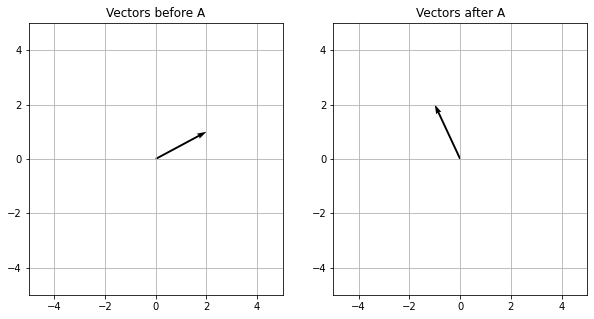

Before A: x = [2 1]
After A: x = [-1  2]


In [10]:
x = np.array([2,1])
A = np.array([[0,-1],
              [1,0]])
fx = np.matmul(A,x)
fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].quiver(x[0],x[1],angles='xy',scale_units='xy', scale = 1)
axs[1].quiver(fx[0],fx[1],angles='xy',scale_units='xy', scale = 1)
axs[0].set_xlim(-5,5)
axs[0].set_ylim(-5,5)
axs[0].grid()
axs[0].set_title("Vectors before A")
axs[1].set_title("Vectors after A")
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.grid()
plt.show()

print("Before A:", "x =",x)
print("After A:", "x =", fx)

This is exactly what we wanted, so we now know the matrix that can rotate any vector by 90 degrees.

2. But what if we want to rotate it 45 degrees? We can use the same principle as our first, by looking at $\hat{i}$ and $\hat{j}$ and where they should land if we applied a 45 degree rotation to them. Our 45 degree rotation matrix looks like:

$$A = \left(\begin{array}{cc} \frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2} \\ \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} \end{array}\right)$$

Let's apply this to our new vector, $x = \left(\begin{array}{c} 1 \\ 1 \end{array}\right)$:

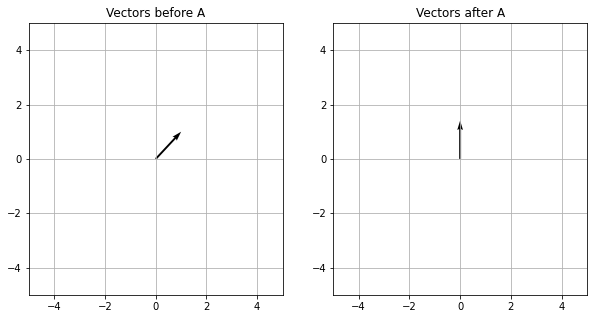

Before A: x = [1 1]
After A: x = [0.         1.41421356]


In [11]:
x = np.array([1,1])
A = np.array([[(2**(0.5))/2,-(2**(0.5))/2],
              [(2**(0.5))/2,(2**(0.5))/2]])
fx = np.matmul(A,x)
fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].quiver(x[0],x[1],angles='xy',scale_units='xy', scale = 1)
axs[1].quiver(fx[0],fx[1],angles='xy',scale_units='xy', scale = 1)
axs[0].set_xlim(-5,5)
axs[0].set_ylim(-5,5)
axs[0].grid()
axs[0].set_title("Vectors before A")
axs[1].set_title("Vectors after A")
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.grid()
plt.show()

print("Before A:", "x =",x)
print("After A:", "x =", fx)

This is correct, because the length of the vector, $x$, is $\frac{\sqrt{2}}{2}$.

3. Now let's look at the patterns, and figure out an equation for rotation for any degree, $\theta$. Looking at $\hat{i}$ individually, we can see that when we rotate the vector in a circle like a unit circle, it's x-coordinate is treated the same as $cos\theta$, while it's y-coordinate is $sin\theta$. So we can say $\hat{i} = \left(\begin{array}{c} cos\theta \\ sin\theta \end{array}\right)$. This will be different for $\hat{j}$ because it already is looking upward, thus has a 90 degree head start. So we can just apply the same thing, except subtract 90 degrees, or $\frac{\pi}{2}$, from $\theta$. So $\hat{j} = \left(\begin{array}{c} cos(\theta - \frac{\pi}{2}) \\ sin(\theta - \frac{\pi}{2}) \end{array}\right) = \left(\begin{array}{c} -sin\theta \\ cos\theta \end{array}\right)$ . Therefore, our final true rotation matrix will be:

$$A = \left(\begin{array}{cc} cos\theta & cos(\theta - \frac{\pi}{2}) \\ sin\theta & sin(\theta - \frac{\pi}{2}) \end{array}\right) = \left(\begin{array}{cc} cos\theta & -sin\theta \\ sin\theta & cos\theta \end{array}\right)$$

Let's test this with vector, $x = \left(\begin{array}{c} 1 \\ 0 \end{array}\right)$, and rotate by 135 degrees, or $\theta = \frac{3\pi}{4}$:

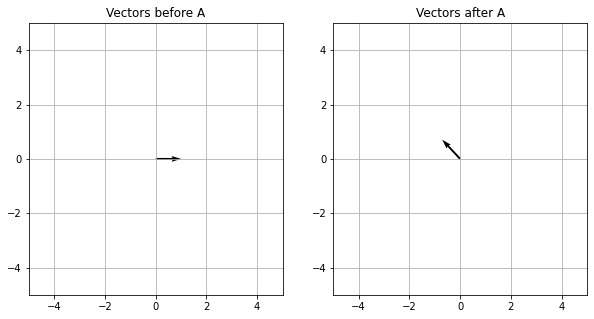

Before A: x = [1 0]
After A: x = [-0.70710678  0.70710678]


In [12]:
x = np.array([1,0])
pi = 3.141592653589793
theta = 3*pi/4
A = np.array([[np.cos(theta),-np.sin(theta)],
              [np.sin(theta),np.cos(theta)]])
fx = np.matmul(A,x)
fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].quiver(x[0],x[1],angles='xy',scale_units='xy', scale = 1)
axs[1].quiver(fx[0],fx[1],angles='xy',scale_units='xy', scale = 1)
axs[0].set_xlim(-5,5)
axs[0].set_ylim(-5,5)
axs[0].grid()
axs[0].set_title("Vectors before A")
axs[1].set_title("Vectors after A")
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.grid()
plt.show()

print("Before A:", "x =",x)
print("After A:", "x =", fx)

This is correct.